## Analysing data science jobs

In this notebook I will be analysing data from glassdoor related to data science and machine learning job openings to help job hunters as well as professionals looking to improve in their careers better understand the job market.

I will be using the CRISP-DM methodology as a guideline to plan, organize and implement the project.

1. Business understanding – What does the business need?
2. Data understanding – What data do we have / need? Is it clean?
3. Data preparation – How do we organize the data for modeling?
4. Modeling – What modeling techniques should we apply?
5. Evaluation – Which model best meets the business objectives?
6. Deployment – How do stakeholders access the results?

The three questions to be answered by the dataset are:

1. What are the top industries hiring data professionals
2. What are the main tools used by data professionals 
3. Which data role has the highest salary

In [190]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [85]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [19]:
glassdoor = pd.read_csv("Data/glassdoor.csv")

<b> Data Preparation </b>

In [44]:
glassdoor.shape

(742, 28)

In [51]:
glassdoor.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,hourly,employer_provided,min_salary,max_salary,avg_salary,company_txt,job_state,same_state,age,python_yn,R_yn,spark,aws,excel
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1,0,0,53,91,72.0,Tecolote Research\n,NM,0,47,1,0,0,0,1
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,0,0,63,112,87.5,University of Maryland Medical System\n,MD,0,36,1,0,0,0,0
2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),-1,0,0,80,90,85.0,KnowBe4\n,FL,1,10,1,0,1,0,1
3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),"Oak Ridge National Laboratory, National Renewa...",0,0,56,97,76.5,PNNL\n,WA,1,55,1,0,0,0,0
4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee",0,0,86,143,114.5,Affinity Solutions\n,NY,1,22,1,0,0,0,1


In [124]:
# Mapping the titles to a predefined list 
title_dict = {
    'Data Science' : 'Data Scientist',
    'Data Scientist' : 'Data Scientist',
    'Data Analyst' : 'Data Analyst',
    'Data Engineer' : 'Data Engineer',
    'Machine Learning': 'Machine Learning Engineer',
    'Research Scientist' : 'Research Scientist',
    'Analytics' : 'Analytics Professional',
    'ANALYTICS' : 'Analytics Professional',
    'Data Management' : 'Data Management',
    'Architect' : 'Data Architect',
    'Scientist' : 'Scientist',
    'Business Intelligence' : 'Business Intelligence Developer',
    'Data Modeler' : 'Data Modeler',
    'Data Visualization' : 'Data Visualization Specialist',
    'SCIENTIST' : 'Scientist',
    'Analyst' : 'Analyst',
    'Product Manager': 'Product Manager'
}

def map_substring(s, dict_map):
    for key in dict_map.keys():
        if key in s: return dict_map[key]
    return np.nan

glassdoor['Title'] = glassdoor['Job Title'].apply(lambda x: map_substring(x, title_dict)).fillna('Other')

In [180]:
# Add senior column to classify job level
glassdoor['Senior_yn'] = np.where(glassdoor['Job Title'].str.contains('Senior|Sr|senior|sr'), 1, 0)

# Add column for jobs that need both Python and R
glassdoor['PythonR_yn'] = np.where((glassdoor['python_yn'] == 1) & (glassdoor['R_yn'] == 1), 1 ,0)

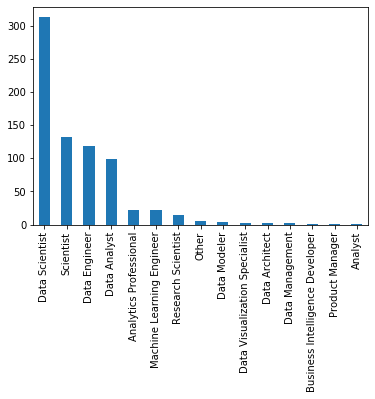

In [127]:
glassdoor['Title'].value_counts().plot(kind='bar')

<b> Q1. Top sectors hiring in the field </b>

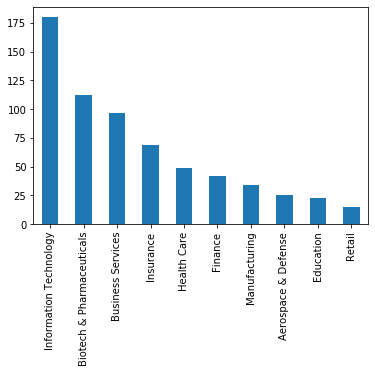

In [149]:
glassdoor['Sector'].value_counts().head(10).plot(kind='bar')

<b> Q2. What tools are the most important to learn </b>

Will evaluate this with what most senior level jobs require

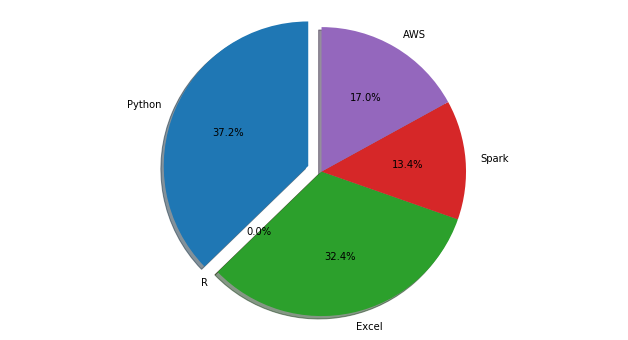

In [211]:
senior_glassdoor = glassdoor[glassdoor['Senior_yn'] == 1]

labels = 'Python', 'R', 'Excel', 'Spark', 'AWS'
tools = [senior_glassdoor['python_yn'].sum(), senior_glassdoor['R_yn'].sum(), senior_glassdoor['excel'].sum(),
        senior_glassdoor['spark'].sum(), senior_glassdoor['aws'].sum()]
explode = (0.1, 0, 0, 0, 0)

fig1, ax1 = plt.subplots(figsize=(11,6))
ax1.pie(tools, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal') 

plt.show()

<b> Q3. Which data role has the highest salary </b>

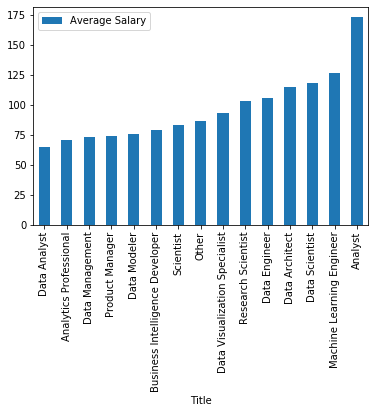

In [221]:
df1 = glassdoor.groupby('Title')['avg_salary'].mean().reset_index(name='Average Salary').sort_values('Average Salary')

df1.plot.bar(x='Title', y='Average Salary')